In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ruptures

https://centre-borelli.github.io/ruptures-docs/

In [2]:
!pip install ruptures

In [3]:
import ruptures as rpt

# Data

Сгенерируем многомерный временной ряд, поведение которого будет меняться. Моменты времени, когда происходит смена поведения такого ряда называется **точкой разладки (change-point)**.

Примеры таких временных рядов:
- Показания датчиков
- Звук
- Видео
- Текст

In [4]:
n_samples, n_dims, sigma = 1000, 3, 2
n_bkps = 4  # number of change-points

signal, bkps = rpt.pw_constant(n_samples, n_dims, n_bkps, noise_std=sigma)

In [5]:
# многомерный временной ряд
signal[:5, :]

array([[  9.89941902, -10.23623699, -10.23346027],
       [  7.71330383,  -8.28553971,  -6.75268391],
       [  2.90768707, -13.67549999,  -8.05490879],
       [ 10.34578084,  -7.28136067,  -9.69698299],
       [  6.51554174,  -7.2025083 , -11.2338048 ]])

In [6]:
# точки разладки
bkps

[215, 403, 592, 792, 1000]

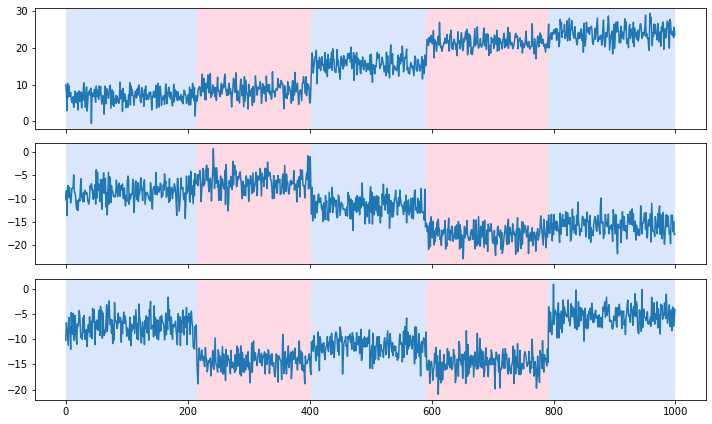

In [7]:
fig, ax_array = rpt.display(signal, bkps)

# Change-point detection #1

Описание методов: https://centre-borelli.github.io/ruptures-docs/user-guide/detection/binseg/

In [8]:
# detection
algo = rpt.Binseg(model="l2")
algo.fit(signal)

result = algo.predict(n_bkps=4)
print(result)

[215, 405, 590, 790, 1000]


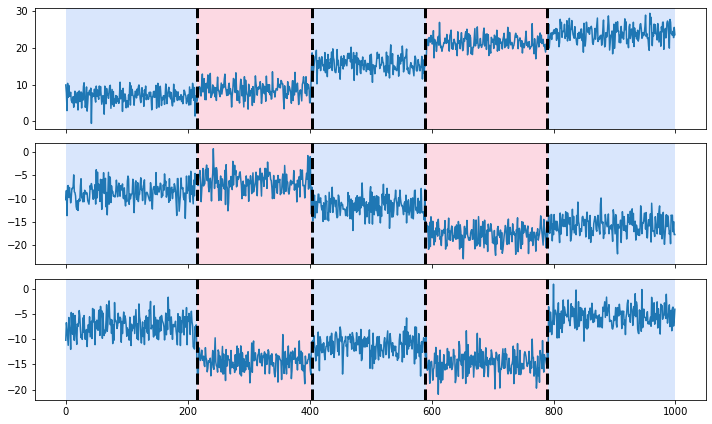

In [9]:
# display
rpt.display(signal, bkps, result)
plt.show()

# Change-point detection #2

In [10]:
# detection
algo = rpt.Window(width=50, model="l2", jump=1)
algo.fit(signal)

result = algo.predict(n_bkps=4)
print(result)

[215, 403, 592, 792, 1000]


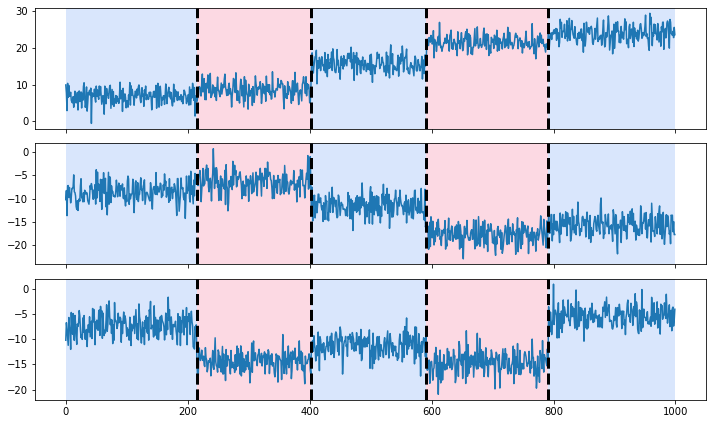

In [11]:
# display
rpt.display(signal, bkps, result)
plt.show()

Получим **score** - меру уверенности алгоритма в том, что произошла точка разладки.

In [12]:
score = algo.score
score[:10]

array([ 1.39506987,  1.13421096,  4.77078806,  5.17042489,  8.57606547,
        8.3027103 , 10.86172047,  9.88610674, 19.47180461, 22.10980776])

Максимумы пиков **score** соответствуют найденным точкам разладки. 

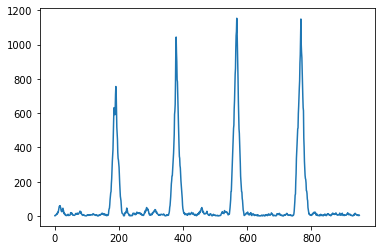

In [13]:
plt.plot(score)
plt.show()